## 2021 Spring "EE479: Scientific Computing & Data"

### Yong-Hoon Kim, KAIST Electrical Engineering

### Linge & Langtagen Ch.4.3.9:  Effects of damping
#### Writer: Hyeonwoo Yeo
#### 2021. 04. 13 revised from <osc_EC_general.py>

We consider an engineering system with a linear spring, $s(u) = kx,$ and a viscous damper, where the damping force is proportional to $u', f(u') = bu',$ for some constant $b > 0$. This choice may model the vertical spring system in a car.

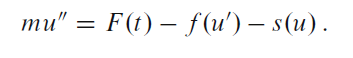

We may choose simple values for the constants to illustrate basic effects of damping (and later excitations). Chossing the oscilattions to be the simple $u(t) = cost$ function in the undamped case, we may set $m = 1, k = 1, b = 0.3, U_0 = 1, V_0 = 0$. 

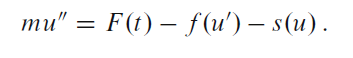

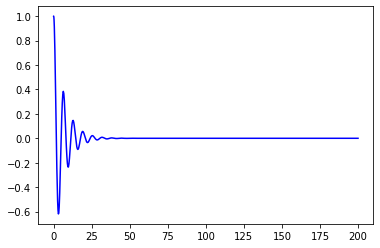

In [1]:
from math import pi
import matplotlib.pyplot as plt
from scipy import integrate as inte
import time

def g(t,Y):
    m = 1
    k = 1
    b = 0.3
    
    u=Y[0]
    v=Y[1]
    dydt=v #v=y'=u'
    F = 0
    s = k*u
    f = b*v
    dvdt=(1./m)*(F - f - s)
    return [dydt,dvdt]

max_iteration = 10**3
t_bound = 200
max_step = 0.5
U_0 = 1
V_0 = 0

solution = inte.BDF(g, 0, [U_0,V_0], t_bound, max_step) #vectorized=True
start_solution = time.time()
t_solution = []
y_solution = []
for i in range(max_iteration):
# get solution step state
    solution.step() #implemented function in scipy to collect data
    t_solution.append(solution.t)
    y_solution.append(solution.y[0])
    if solution.status == 'finished' :
        time_solution = time.time() - start_solution
 #       print(y_solution)
        break

index = int(len(y_solution)*100/100.)
plt.plot(t_solution[-index:], y_solution[-index:], 'b-')
plt.show()

#print("calculation time:", time_solution)